Examples of utilities for working with Pytorch modules

## Hooks

### Hook class

In [1]:
import torch
from torchvision.models import resnet50

from torchtrainer.util.module_util import FeatureExtractor, Hook

# Example batch and model
batch = torch.rand(16, 3, 224, 224)
model = resnet50()

# Create hook for a layer
hook = Hook(model.layer1)

# Apply model to data. The .activation attribute of the hook will be populated with
# the activation of thet layer
_ = model(batch)
act = hook.activation
print(act.shape)

# We can also remove the hook if necessary
hook.remove()

torch.Size([16, 256, 56, 56])


### FeatureExtractor class

In [2]:
# Layers to capture activations
modules = ["relu", "layer1", "layer2", "layer3", "layer4"]
features = FeatureExtractor(model, modules)

# Apply model to the batch. `acts` will be a dictionary with the activations
acts = features(batch)
for k, v in acts.items():
    print(k, v.shape)

relu torch.Size([16, 64, 112, 112])
layer1 torch.Size([16, 256, 56, 56])
layer2 torch.Size([16, 512, 28, 28])
layer3 torch.Size([16, 1024, 14, 14])
layer4 torch.Size([16, 2048, 7, 7])
out torch.Size([16, 1000])


## Receptive field

We can also capture the receptive field of a neural network

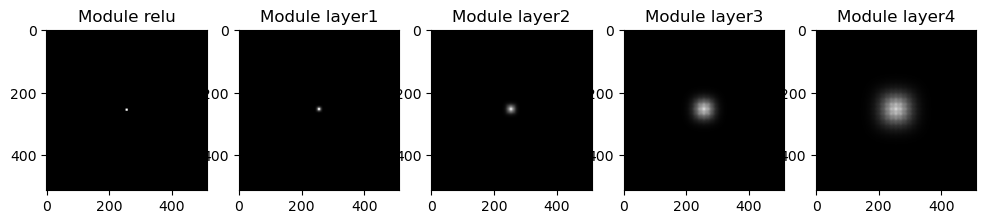

In [3]:
import matplotlib.pyplot as plt
from torchvision.models import resnet

from torchtrainer.util.module_util import ReceptiveField

model = resnet.resnet50()
modules = ["relu", "layer1", "layer2", "layer3", "layer4"]
receptive_field = ReceptiveField(model)

rfs = []
for name in modules:
    rfs.append(receptive_field.receptive_field(name, num_channels=3))

fig, ax = plt.subplots(1, 5, figsize=(12,4))
for idx, (name, rf) in enumerate(zip(modules, rfs)):
    ax[idx].imshow(rf, "gray")
    ax[idx].set_title(f"Module {name}")

Notice that the central region of the receptive fields have larger weights. We can also binarize the receptive field to get all pixels that have an influence on the output:

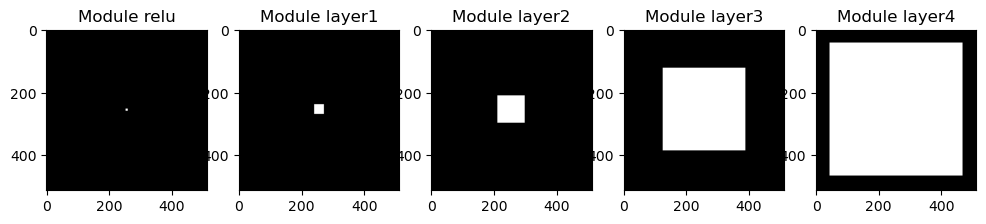

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(12,4))
for idx, (name, rf) in enumerate(zip(modules, rfs)):
    ax[idx].imshow(rf>0, "gray")
    ax[idx].set_title(f"Module {name}")

In [ ]:
models = [
    resnet.resnet18(), resnet.resnet34(), resnet.resnet50(), resnet.resnet101(), resnet.resnet152()
    ]
rfs = []
for model in models:
    receptive_field = ReceptiveField(model)
    rfs.append(receptive_field.receptive_field("layer4", num_channels=3, img_size=(512, 512)))

fig, ax = plt.subplots(1, 5, figsize=(12,4))
names = ["resnet18", "resnet34", "resnet50", "resnet101", "resnet152"]
for idx, (name, rf) in enumerate(zip(names, rfs)):
    ax[idx].imshow(rf, "gray")
    ax[idx].set_title(f"Model {name}")

Notice that the receptive field of the ResNet50 model is smaller than ResNet34!